# Experiments folder visualization

In [1]:
cd /home

/home


In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import os
import re

In [3]:
styles = {'MLP+ATT':{'marker':'^', 'linestyle':'-'}, 
          'LSTM+ATT':{'marker':'o', 'linestyle':'--'}, 
          'Baseline':{'marker':'s', 'linestyle':':'}}

In [4]:
folder_to_visualice = './presentation/experiments/astromer_0/results_deephub/results/'
folders = ['']
for x in os.listdir(folder_to_visualice):
#     if '_zero-mean' not in x: continue
    print(x)
    folders.append(x)
folders

macho_clean_50_zero-mean_LR1e-05_alpha2
bugstromer_macho_clean_50_zero-mean_LR1e-05_alpha2_1e-5


['',
 'macho_clean_50_zero-mean_LR1e-05_alpha2',
 'bugstromer_macho_clean_50_zero-mean_LR1e-05_alpha2_1e-5']

In [5]:
# folders = ['',
#  'alcock_0_r0_zero-mean_LR1e-05',
#  'alcock_0_r20_zero-mean_LR1e-05',
#  'alcock_0_r40_zero-mean_LR1e-05',

#  'alcock_0_r80_zero-mean_LR1e-05',
#            'alcock_0_r100_zero-mean_LR1e-05']

In [6]:
def get_title_macho_clean_pt(subfolder, return_mask=False):
    if 'old' in subfolder:
        pcge_probed = 50
        pcge_masked = 0
        title = f'~{pcge_probed}% probed \n {pcge_masked}% masked'
        
    if 'first' in subfolder:
        print(subfolder)
        pcge_probed = 50
        pcge_masked = 30
        title = f'{pcge_probed}% probed \n {pcge_masked}% masked (1e-3)'
    else: 
        pcge_probed = float(subfolder.split('_')[3])
        factor = .4
        pcge_masked = pcge_probed - factor*pcge_probed 
        if pcge_masked == 0.: pcge_probed = 100 
        title = f'{pcge_probed}% probed \n {pcge_masked}% masked'
    if return_mask:
        return title, pcge_masked
    return title
    
def get_title_alcock_pt(subfolder):
    pcge_probed = float(subfolder.split('_')[1])
    factor = .4
    pcge_masked = pcge_probed - factor*pcge_probed 
    if pcge_masked == 0.: pcge_probed = 100
    title = '{:.0f}% probed \n {:.0f}% masked'.format(pcge_probed, pcge_masked)
                
def get_title_random_alcock(subfolder):
    if 'old' in subfolder:
        title = '(a) Paper'
    else:
        pcge_probed = float(subfolder.split('_')[1])
        random = subfolder.split('_')[2].split('r')[-1]
        title = f'100% probed \n 0% masked \n {random}% random'
    return title

def get_title_final(subfolder):
    
    if 'old' in subfolder:
        title = '(a) Paper'
        return title 
    
    if 'bugstromer' in subfolder:
        title = '(b) Bugstromer on clean'
        return title
    
    title = '(c) ASTROMER on clean'

    return title


ft_names_changed = {
    'alcock': 'MACHO', 'atlas': 'ATLAS', 'ogle':'OGLE-III'
}

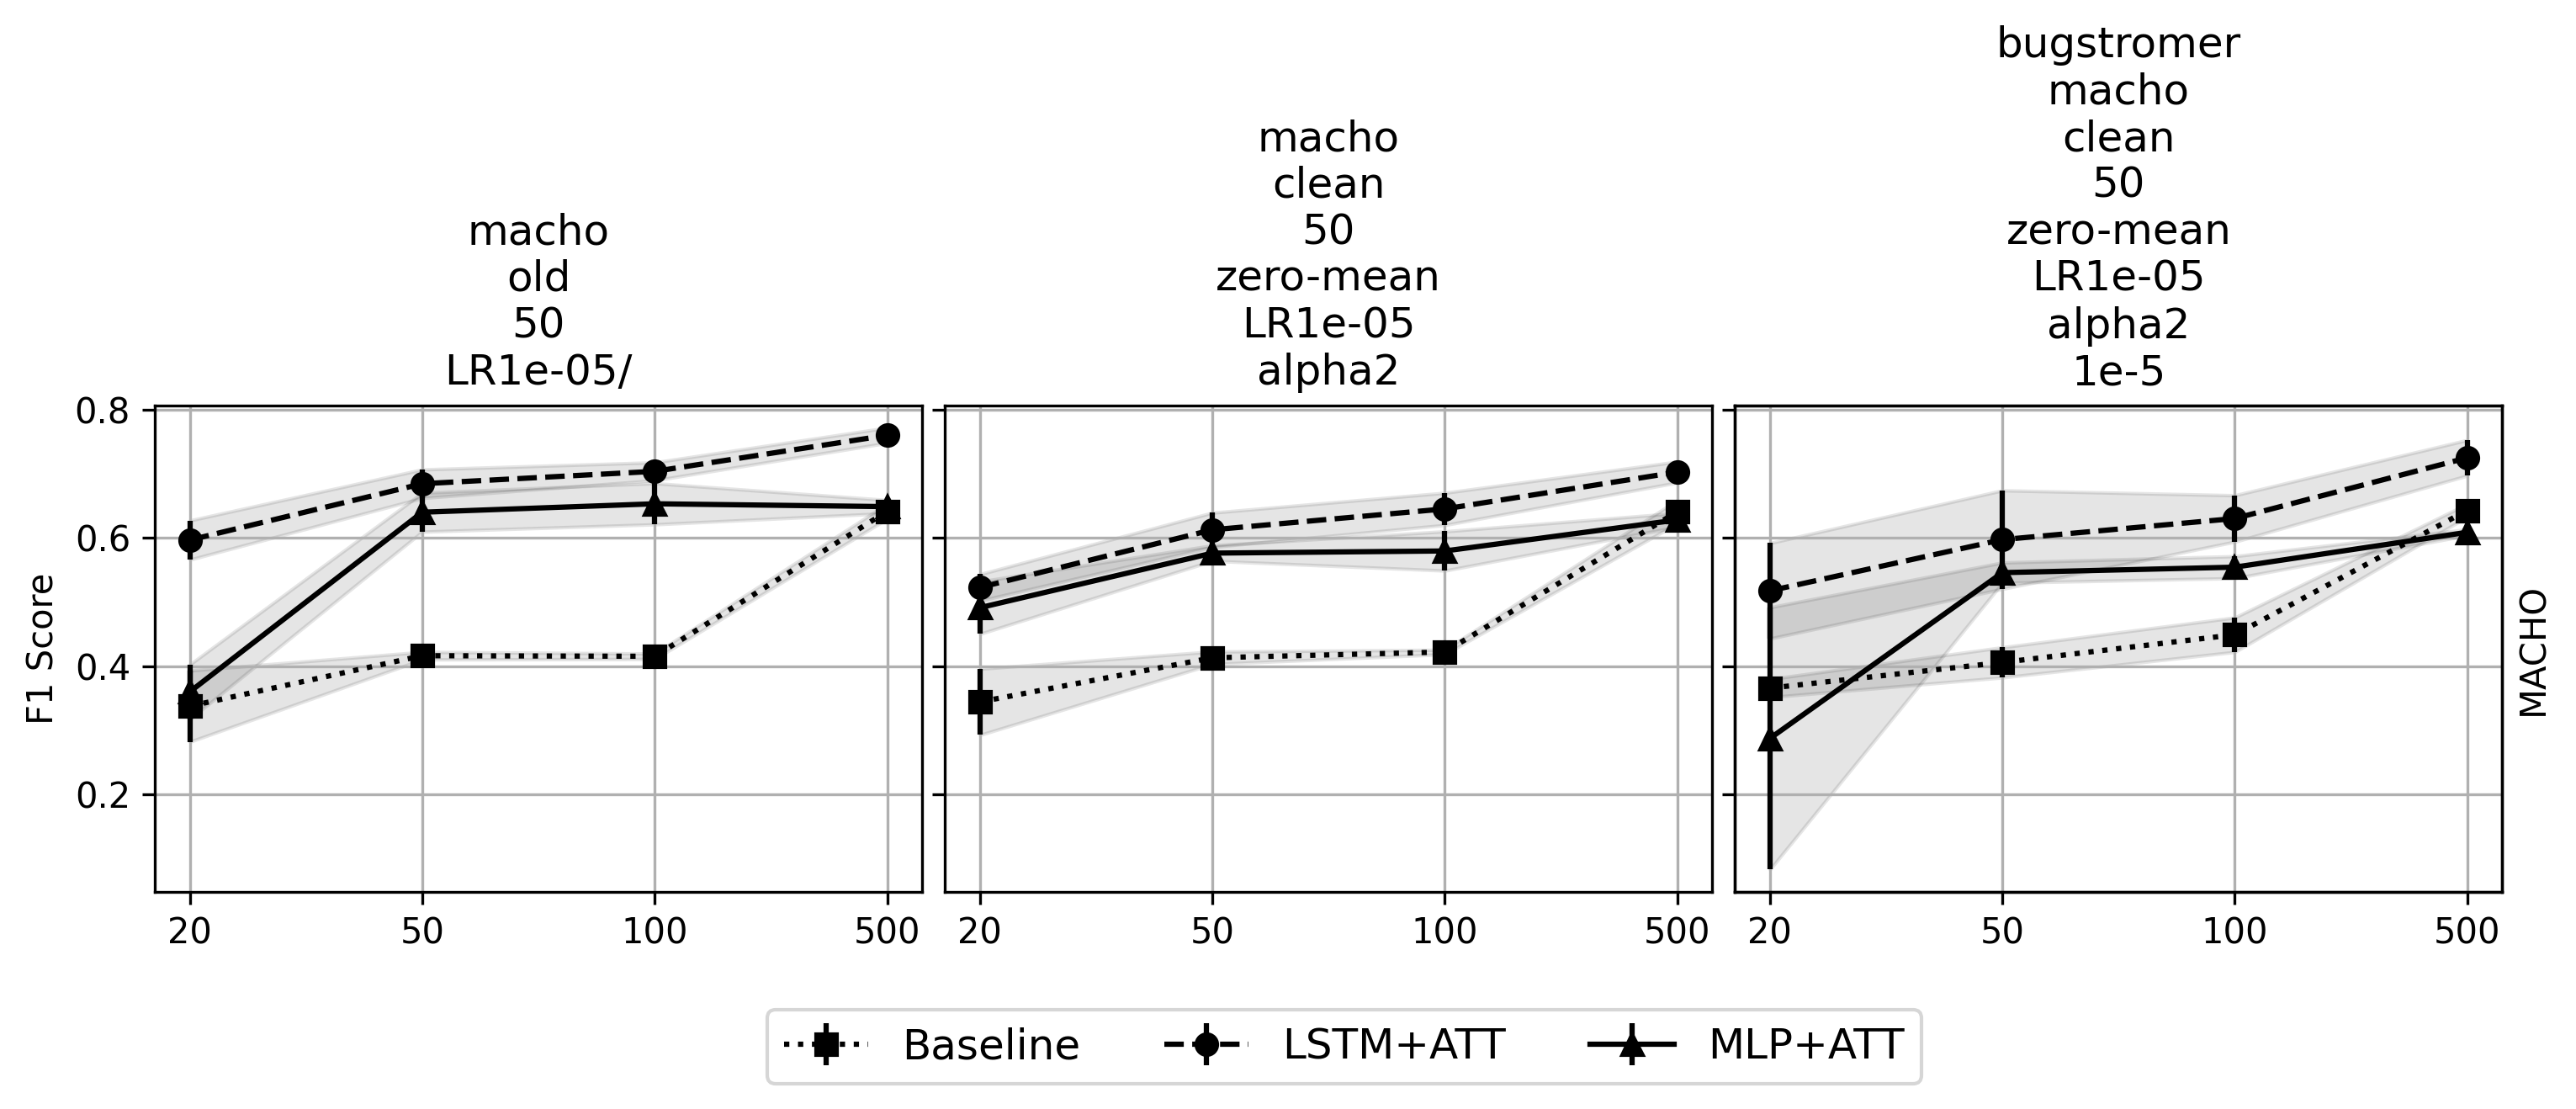

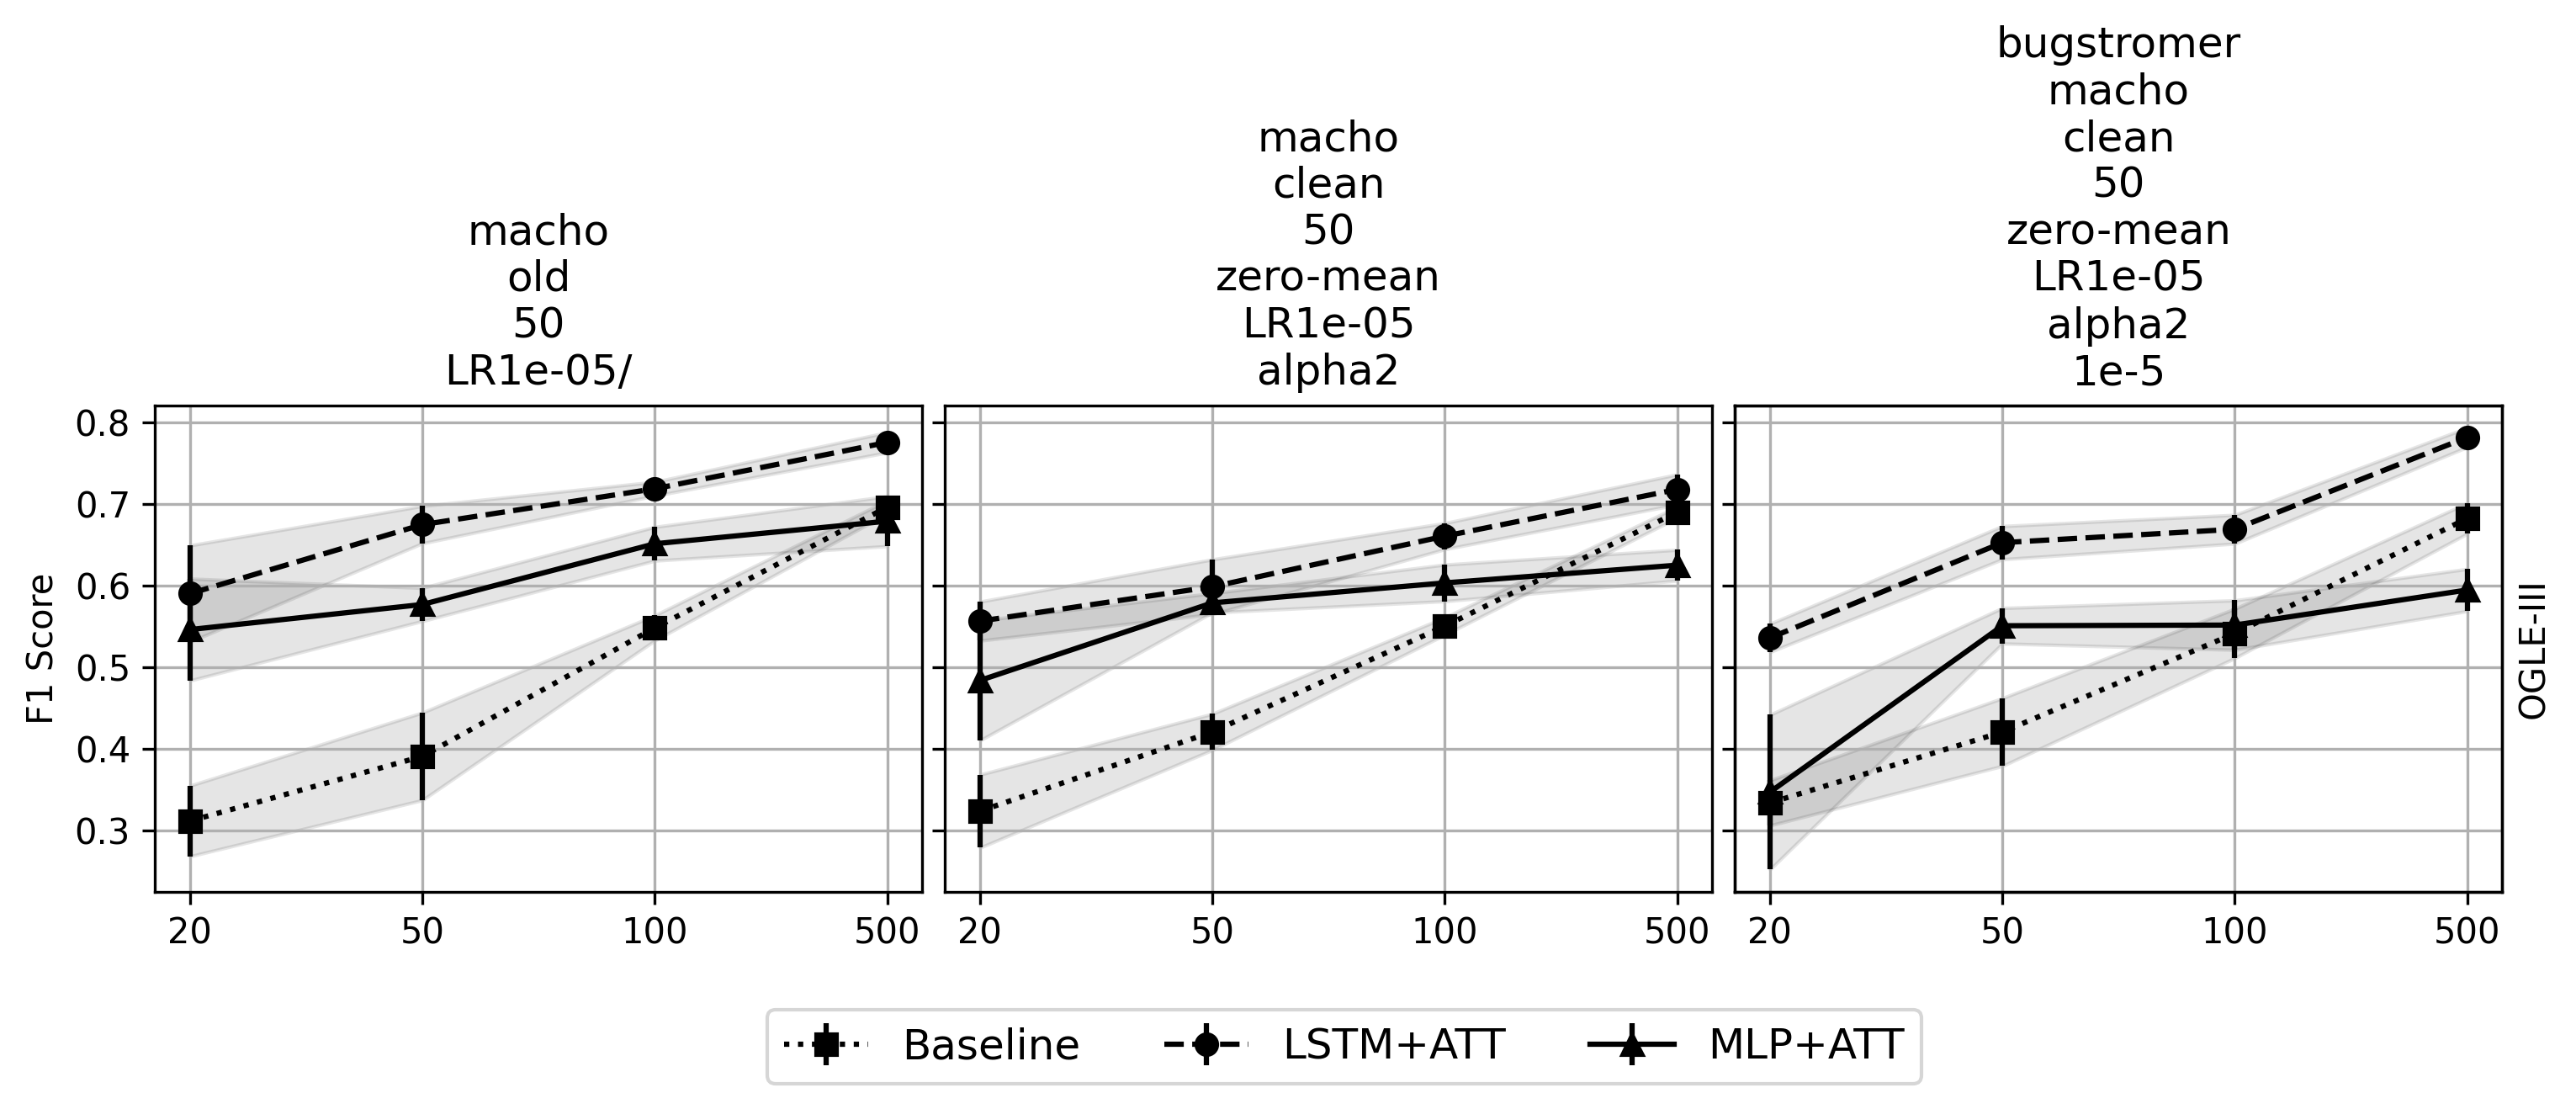

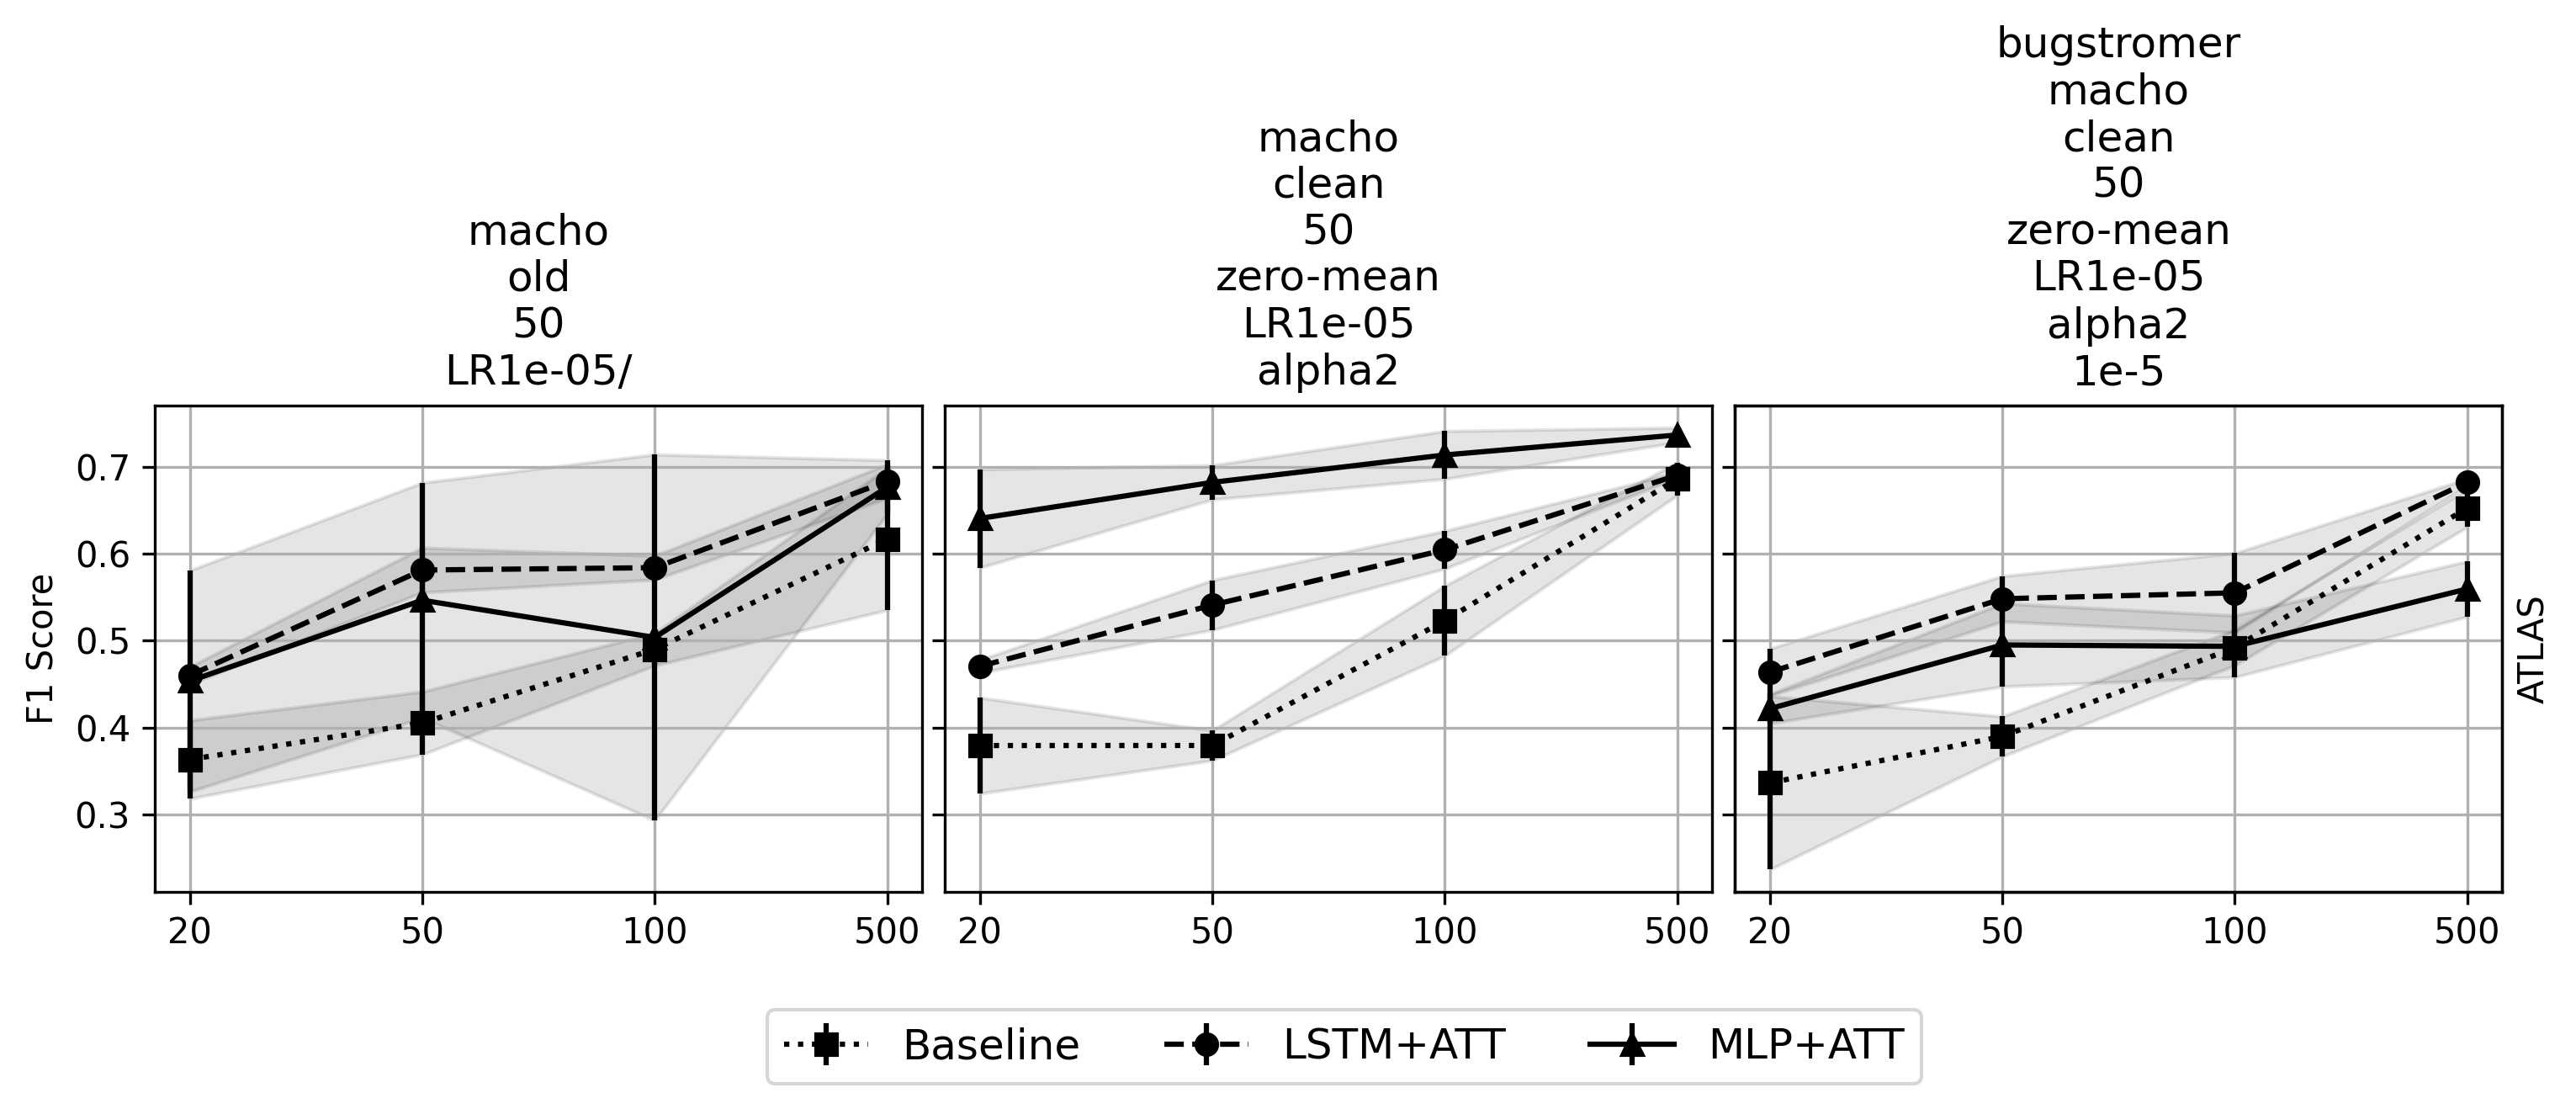

In [19]:
final_corr = dict()
for subset in ['alcock', 'ogle', 'atlas']:
    all_mlp_results = []
    all_mask_results = []
    all_mlp_results_std = []
    all_spc_results = []
    substr = 'pretraining'
    # subset = 'ogle'

    fig, axes = plt.subplots(1, len(folders), figsize=(12,2.5), sharey=True, sharex=True, dpi=300,
                            gridspec_kw={'hspace': 0.1, 'wspace': 0.03})    
    
    axes = axes.flatten()
    count=0
    for subfolder in folders:
        try:
            if count == 0:
                subfolder = 'macho_old_50_LR1e-05/'
                path_clf = os.path.join('./presentation/experiments/astromer_0/results_old/', 
                                        subfolder,
                                        subset, 
                                        'classification', 
                                        'metrics.csv')
                clf_metrics = pd.read_csv(path_clf)
                clf_metrics = clf_metrics[clf_metrics['sci_case'] == 'b']
            else:
                path_clf = os.path.join(folder_to_visualice, 
                        subfolder, 
                        subset, 
                        'classification', 
                        'metrics.csv')
                clf_metrics = pd.read_csv(path_clf)
                if 'bug' in subfolder:
                    clf_metrics = clf_metrics[clf_metrics['sci_case'] == 'b']
                else:
                    clf_metrics = clf_metrics[clf_metrics['sci_case'] == 'a']

            mean_clf = clf_metrics.groupby(['model', 'spc'])['test_f1'].mean()

            std_clf = clf_metrics.groupby(['model', 'spc'])['test_f1'].std()
            
            clf_mean_groups = np.split(mean_clf.values, 3)
            clf_std_groups  = np.split(std_clf.values, 3)
            clf_names = ['Baseline', 'LSTM+ATT', 'MLP+ATT']
            x_spc = [20, 50, 100, 500]    

            for xmean, xerr, name in  zip(clf_mean_groups, clf_std_groups, clf_names):
#                 if name == 'Baseline': continue        
                x_range = np.arange(len(x_spc))
                
                axes[count].errorbar(x_range, xmean, yerr=xerr, label=name, color='k', 
                                     marker=styles[name]['marker'],
                                     linestyle=styles[name]['linestyle'])

                axes[count].fill_between(x_range, 
                                       xmean+xerr, 
                                       xmean-xerr,
                                       color='k', alpha=0.1)

                axes[count].grid()
#                 axes[count].set_ylim(0.1, 0.8)
#                 axes[count].set_yticks(np.arange(0.1, 0.81, 0.1))
                axes[count].set_xticks(x_range)
                axes[count].set_xticklabels(x_spc)
#                 title, mask_ptge = get_title_macho_clean_pt(subfolder, return_mask=True)
#                 title = get_title_final(subfolder)
#                 title = get_title_random_alcock(subfolder)
                mask_ptge = 50
                title='\n'.join([x for x in subfolder.split('_')])
                if subset == 'alcock' or True:
                    axes[count].set_title(title)
                
                if name == 'LSTM+ATT':
                    all_mlp_results.append(xmean)
                    all_mlp_results_std.append(xerr)
                    all_mask_results.append(mask_ptge)
                    all_spc_results.append(x_spc)
                    
            count+=1
        except Exception as e:
            print(count)
            print(e)
            continue
    
    if subset == 'atlas' or True:
        axes[-2].legend(ncol=3, bbox_to_anchor = (1.3, -0.2), fontsize=12)
        
    axes[0].set_ylabel('F1 Score')
    
    ax2 = axes[-1].twinx()     
    ax2.set_yticks([])
    ax2.set_ylabel(ft_names_changed[subset])
    
    final_corr[ft_names_changed[subset]] = {
        'mean':all_mlp_results,
        'std':all_mlp_results_std,
        'mask_val':all_mask_results,
        'spc_all':all_spc_results
    }
    
    fig.savefig('./presentation/figures/errata/clf_{}.pdf'.format(ft_names_changed[subset]),
               format='pdf', bbox_inches="tight")

Due to the removal of observations by masking, the resulting representation is further compromised. As a consequence, the performance of the LSTM during classification is improved. This can be attributed to the fact that the encoder only transforms the information into higher dimensions, while retaining the total information.

It is noteworthy that an increase in masking appears to positively impact the performance of the MLP+ATT model, as indicated by an improvement in its F1 score. This can potentially be explained by the fact that, when utilizing masking, the model is required to preserve long-short term information for each position of the embedding, rather than simply learning identity, which is the case when no masking is applied.

The issue at hand is that while the mask is indeed helpful, it is not sufficient on its own. Thus, an additional task in the pretraining phase or an improvement upon the existing task is required in order to address this limitation.

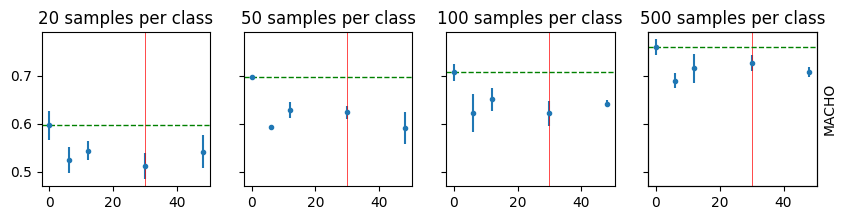

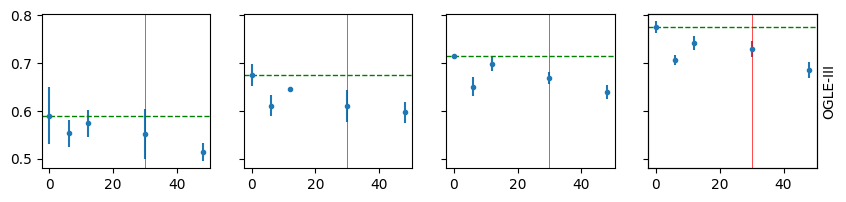

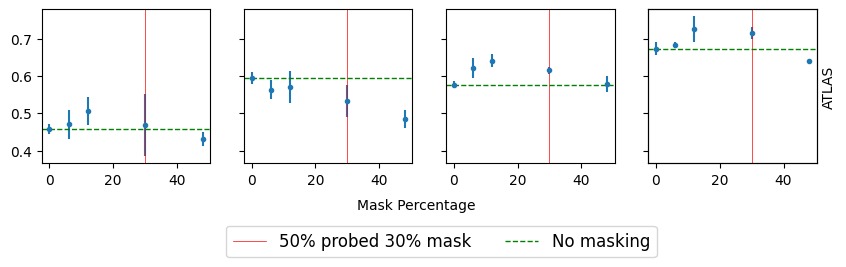

In [229]:

for ds, ds_d in final_corr.items():
    fig, axes = plt.subplots(1, len(all_mlp_results_std), figsize=(10, 2), sharex=True, sharey=True)
    all_mask_results = np.transpose(ds_d['mask_val'])
    all_mlp_results = np.transpose(ds_d['mean'])
    all_mlp_results_std = np.transpose(ds_d['std'])
    count = 0
    for y, e in zip(all_mlp_results, all_mlp_results_std):
        indices = np.argsort(all_mask_results)
        x = all_mask_results[indices]
        y = y[indices]
        e = e[indices]
        axes[count].errorbar(x, y, yerr=e, marker='.', linestyle='')
        if ds == 'MACHO':
            axes[count].set_title(f'{all_spc_results[0][count]} samples per class')
        axes[count].axvline(x = 30, color = 'r', linewidth=0.5, label = '50% probed 30% mask')
        axes[count].axhline(y = y[0], color = 'g', linewidth=1, linestyle = '--', 
                            label = 'No masking')
        count+=1
        
    ax2 = axes[-1].twinx()     
    ax2.set_yticks([])
    ax2.set_ylabel(ds)
    
    if ds == 'ATLAS':
        fig.text(0.5, -0.1, 'Mask Percentage', ha='center', va='center')
        axes[3].legend(ncol=3, bbox_to_anchor = (0.1, -0.35), fontsize=12)
    plt.show()

## config

In [11]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import os
import tomli

# root = './results/results_macho/'
# for folder in os.listdir(root):
# #     if folder == 'results_macho':continue
#     config = os.path.join('./config_files/config_files', folder)
#     file = [os.path.join(config, x) for x in os.listdir(config)][0]
#     target = os.path.join(root, folder, 'config.toml')
#     shutil.copy(file, target)

In [12]:
root = './results/'

In [13]:
titles       = []
rmse_list    = []
rsquare_list = []
folders = []
for folder in os.listdir(root):
    conf_path = os.path.join(root, folder, 'config.toml')
    if os.path.exists(conf_path):
        with open(conf_path, mode="rb") as fp:
            config = tomli.load(fp)  
        
        if 'minmax' in folder: continue
        folders.append(os.path.join(root, folder))
        
        pt_path = os.path.join(root, folder, 'pretraining', 'metrics.csv')
        pt_df = pd.read_csv(pt_path)
        pt_res = pt_df[pt_df['step'] == 'pretraining']
        rsquare_val = pt_res['r_square'].values[0]
        rmse_val = pt_res['rmse'].values[0]

        data_pt    = config['pretraining']['data']['path']
        batchsize  = config['pretraining']['data']['batch_size']
        learn_rate = config['pretraining']['lr']
        
        mask = config['masking']['mask_frac']
        rnd  = config['masking']['rnd_frac']
        sme  = config['masking']['same_frac']
        probed = mask - (rnd*mask + sme*mask)

        if 'new' in data_pt:
            title_ds = 'MACHOc'
        else:
            title_ds = 'MACHO'
        
        t = [title_ds, str(learn_rate), str(batchsize), 'P: {:.0f}'.format(mask*100), 'M: {:.0f}'.format(probed*100)]
        
        titles.append('\n'.join(t))
        rmse_list.append(rmse_val)
        rsquare_list.append(rsquare_val)
        
path_paper = os.path.join('./results_old/macho_old_50_LR1e-05/', 'pretraining', 'metrics.csv')
df_paper = pd.read_csv(path_paper)

rsquare_val = df_paper['r_square'].values[0]
rmse_val = df_paper['rmse'].values[0]

rmse_list.append(rmse_val)
rsquare_list.append(rsquare_val)
titles.append('Paper')

In [14]:
INDICES = np.argsort(rmse_list)

rmse_list_s = np.array(rmse_list)[INDICES]
rsquare_list_s = np.array(rsquare_list)[INDICES]
titles_s = np.array(titles)[INDICES]

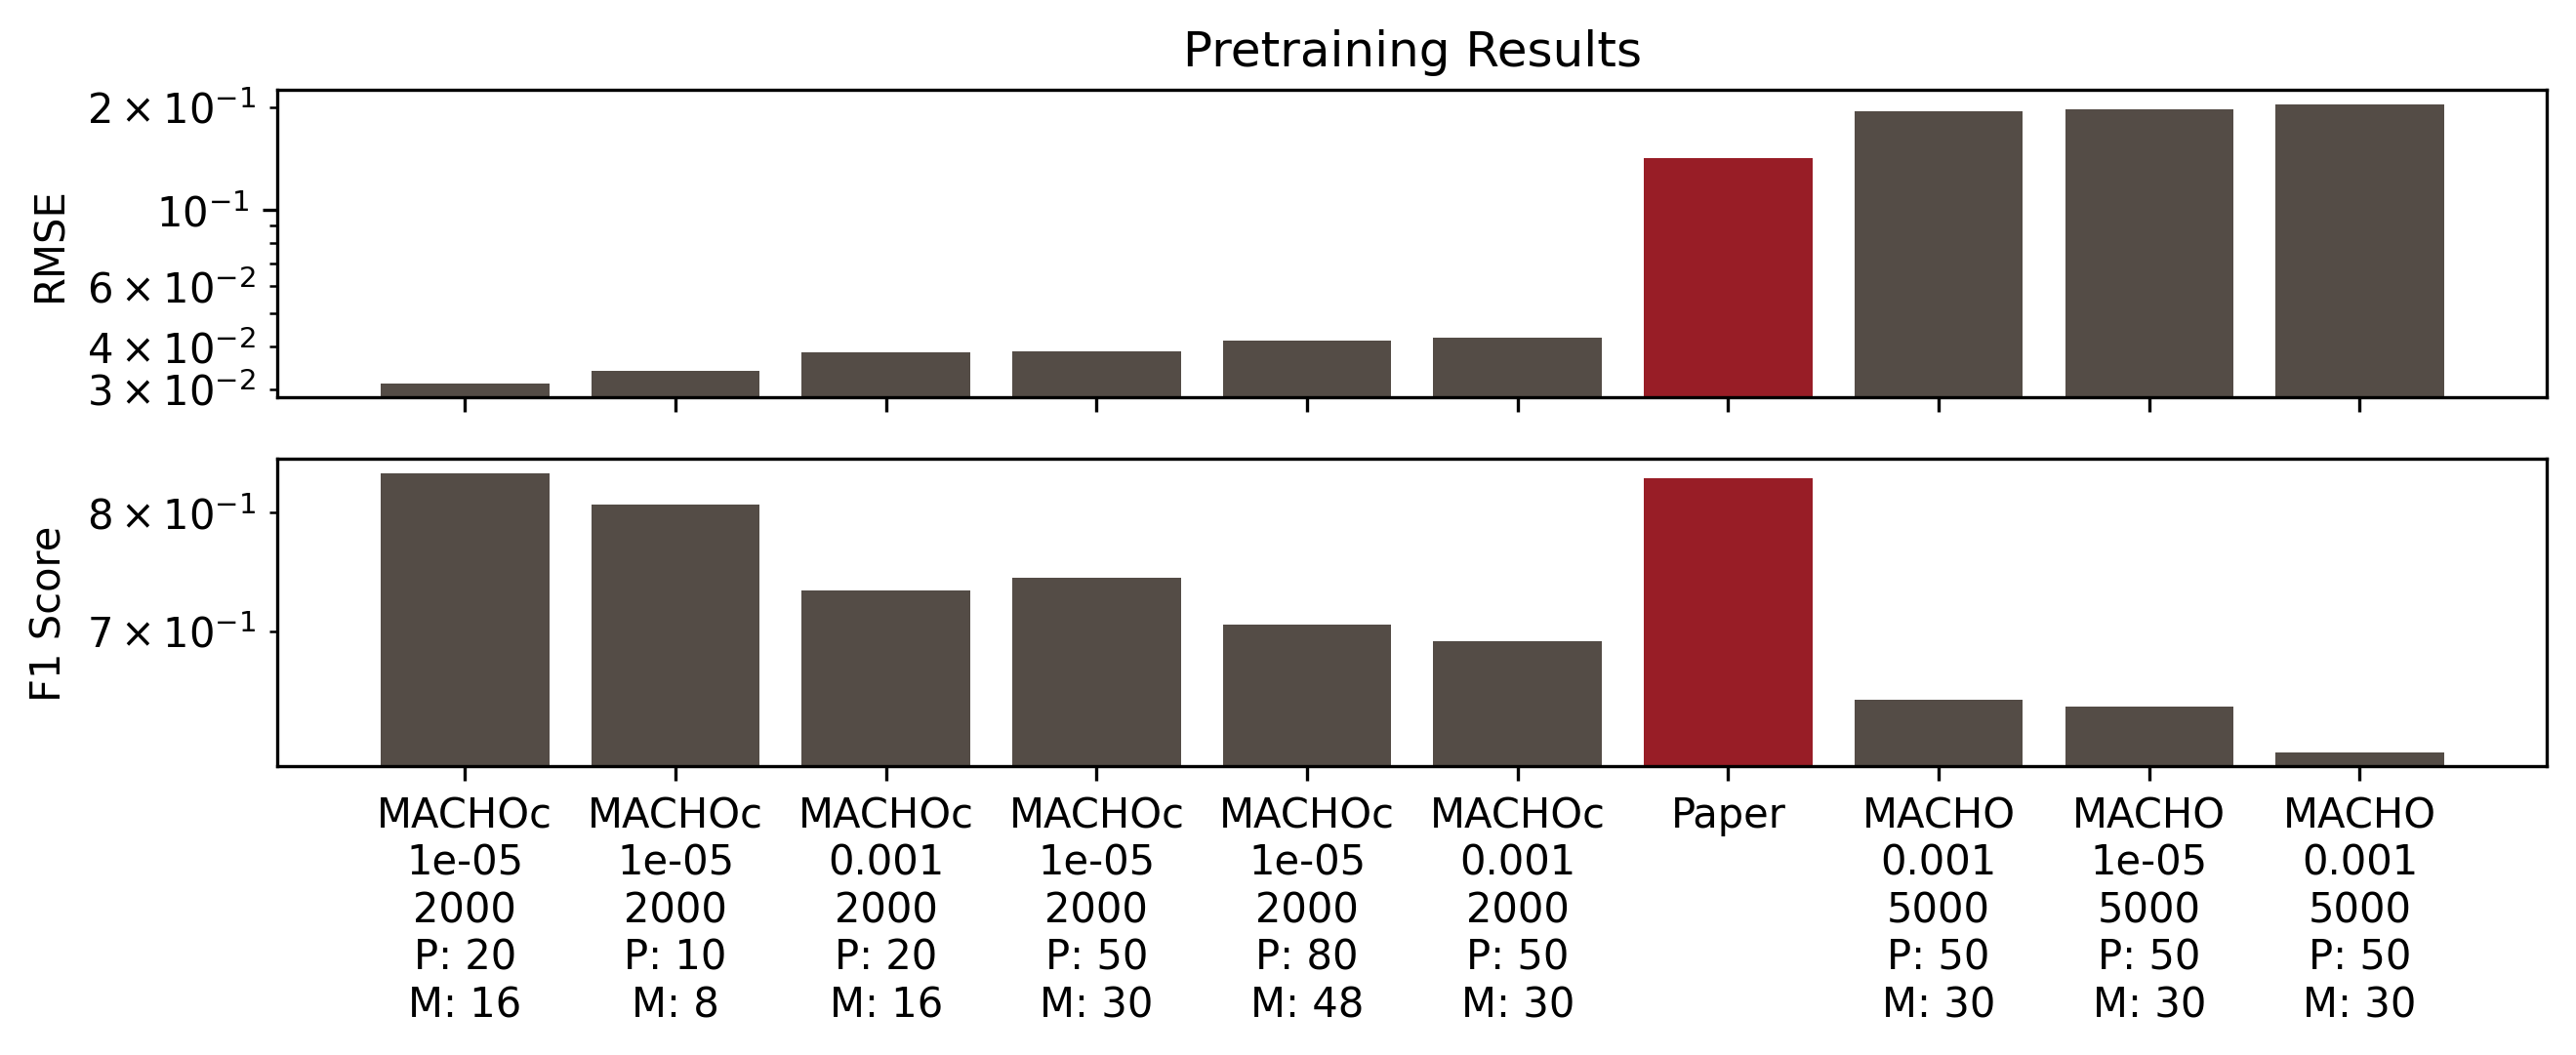

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3), sharex=True, dpi=300)
x = np.arange(len(rmse_list_s))
colors = ['#981D26' if x == 'Paper' else '#544C46' for x in titles_s]
axes[0].bar(x, rmse_list_s, color=colors)
axes[0].set_xticks(x)
axes[0].set_yscale('log')
axes[0].set_title('Pretraining Results')
axes[0].set_ylabel('RMSE')

axes[1].bar(x, rsquare_list_s, color=colors)
axes[1].set_xticks(x)
axes[1].set_xticklabels(titles_s)
axes[1].set_yscale('log')
axes[1].set_ylabel('F1 Score')
plt.show()

# Classification

In [199]:
styles = {'MLP+ATT':{'marker':'^', 'linestyle':'-'}, 
          'LSTM+ATT':{'marker':'o', 'linestyle':'--'}, 
          'Baseline':{'marker':'s', 'linestyle':':'}}

ft_names_changed = {
    'alcock': 'MACHO', 'atlas': 'ATLAS', 'ogle':'OGLE-III'
}

clf_names_changed = {
    'lstm_att': 'LSTM+ATT', 'mlp_att': 'MLP+ATT', 'lstm':'Baseline'
}

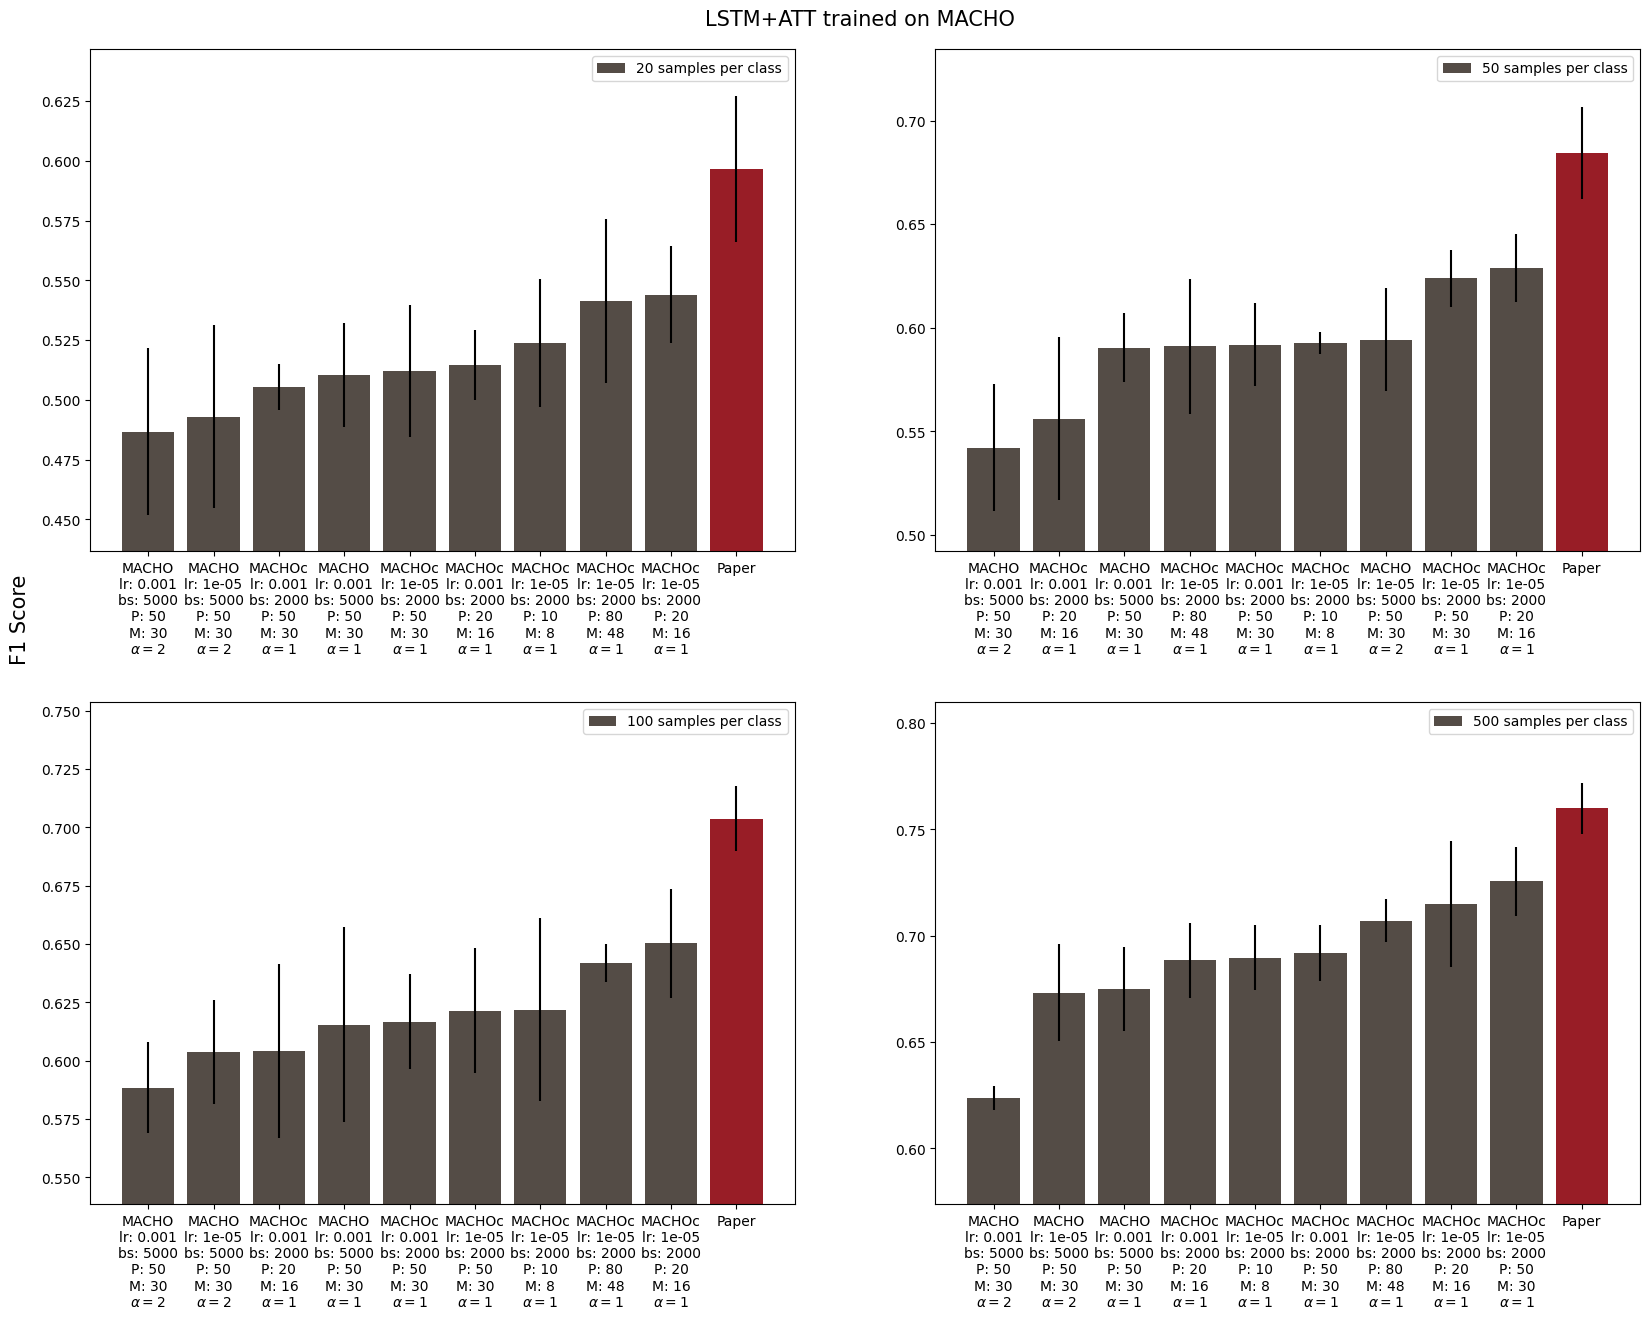

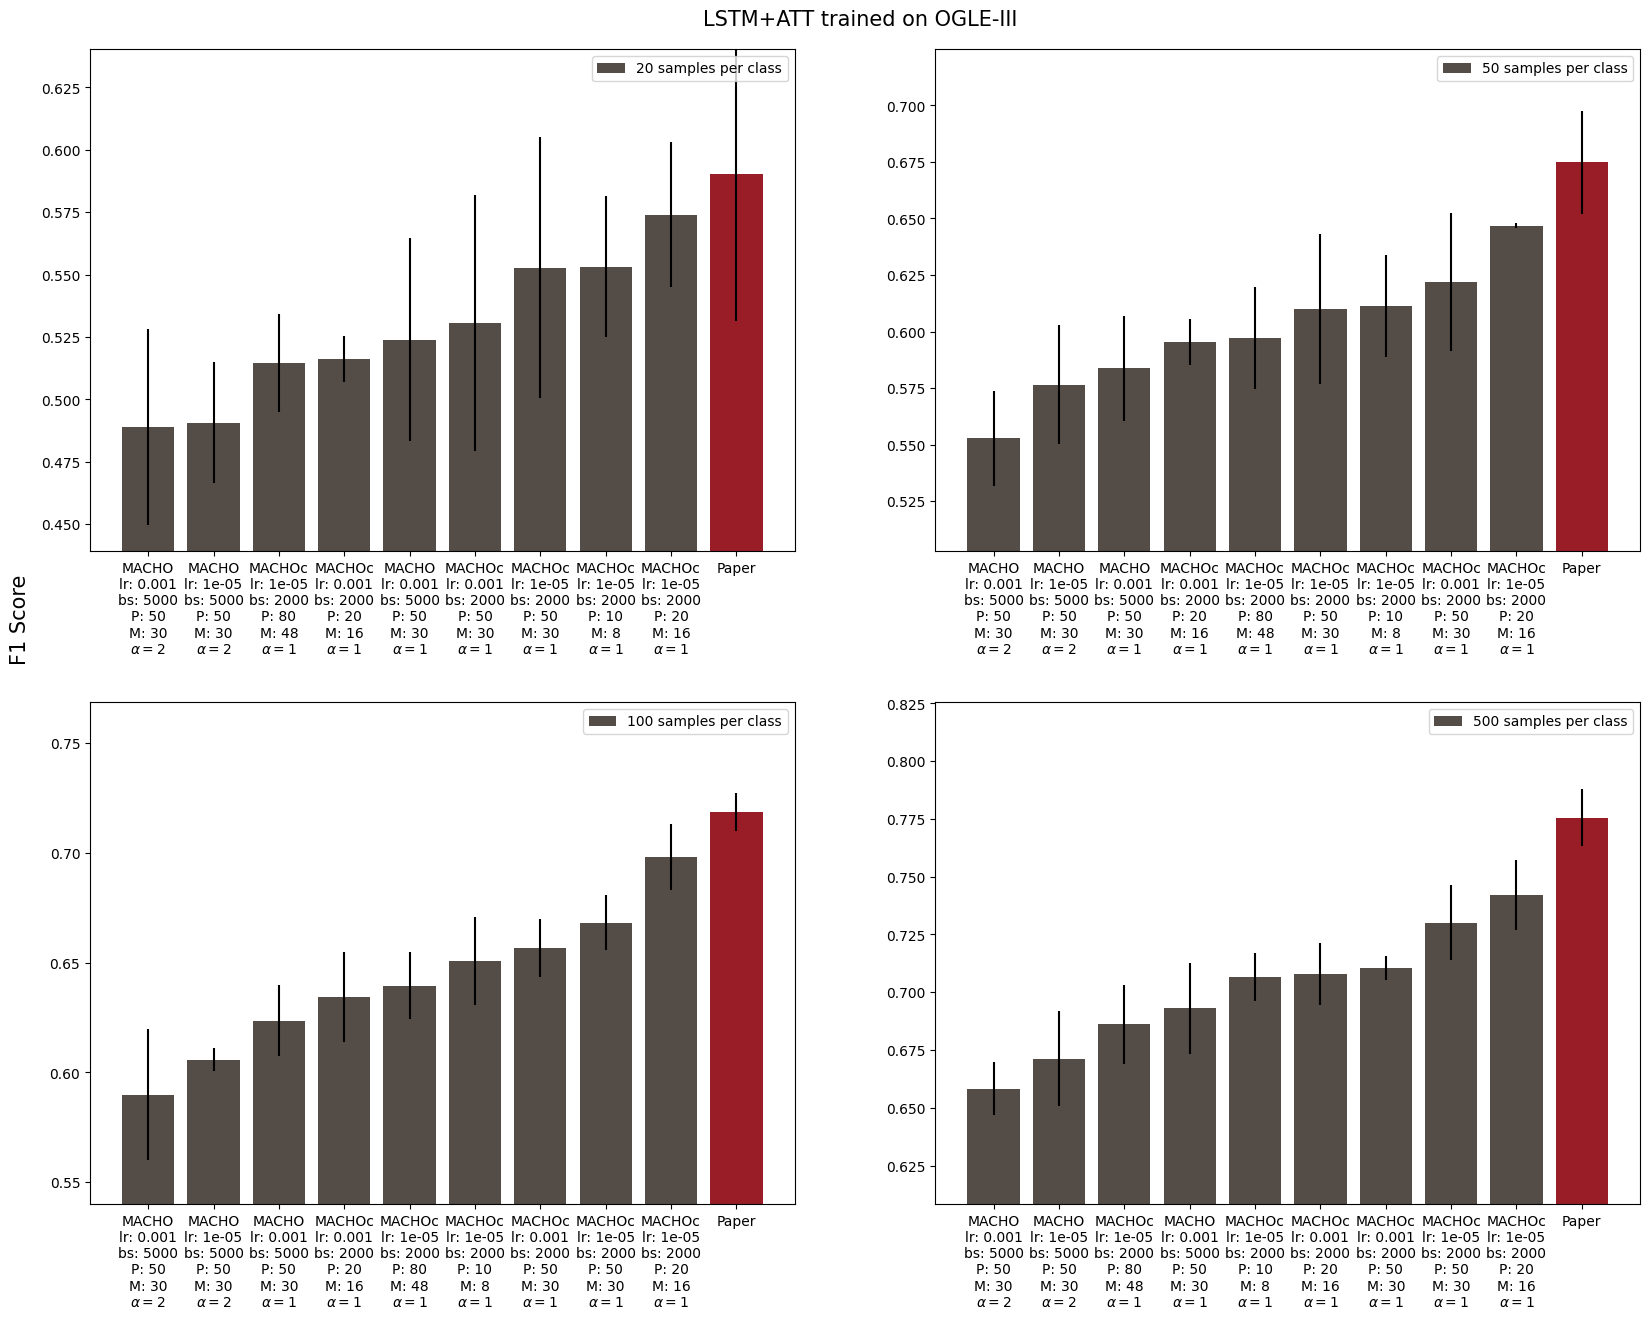

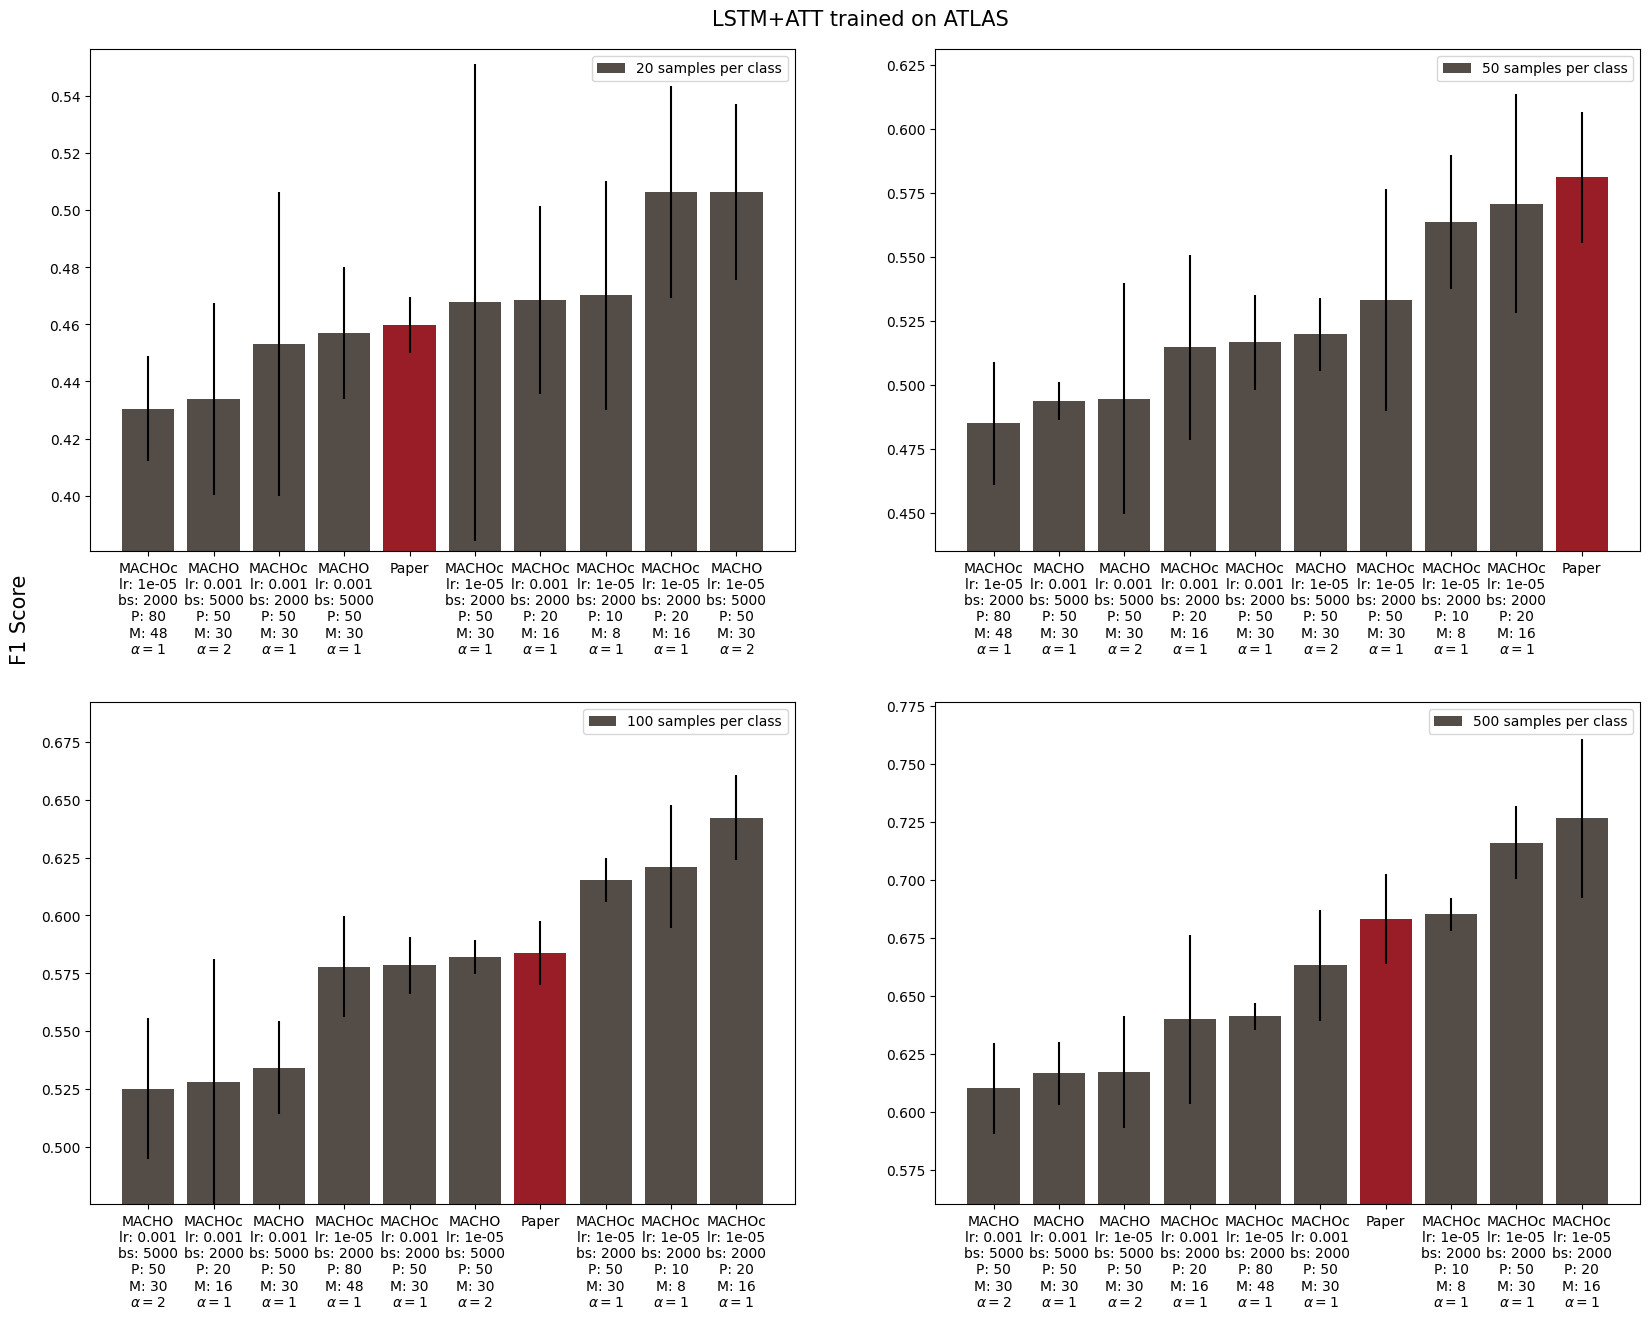

In [212]:
clf_model = 'lstm_att'
for data in ['alcock', 'ogle', 'atlas']:
    fig, axes = plt.subplots(2, 2, figsize=(20,15), gridspec_kw={'hspace': 0.3, 'wspace': 0.2})
    axes = axes.flatten()
    for i, spc in enumerate([20, 50, 100, 500]):
        mean_f1, std_f1, titles = [], [], []
        for folder in os.listdir(root):
            conf_path = os.path.join(root, folder, 'config.toml')
            if os.path.exists(conf_path):
                with open(conf_path, mode="rb") as fp:
                    config = tomli.load(fp)  

                if 'minmax' in folder: continue
                folders.append(os.path.join(root, folder))

                pt_path = os.path.join(root, folder, data, 'classification', 'metrics.csv')

                clf_df = pd.read_csv(pt_path)

                data_pt    = config['pretraining']['data']['path']
                batchsize  = config['pretraining']['data']['batch_size']
                learn_rate = config['pretraining']['lr']
                alpha_pe = config['positional']['alpha']

                mask = config['masking']['mask_frac']
                rnd  = config['masking']['rnd_frac']
                sme  = config['masking']['same_frac']
                probed = mask - (rnd*mask + sme*mask)

                cond0 = clf_df['sci_case']=='b'
                cond1 = clf_df['spc']==spc
                cond2 = clf_df['model']==clf_model

                res = clf_df[(cond0) & (cond1) & (cond2)]
                mean_f1.append(res['test_f1'].mean())
                std_f1.append(res['test_f1'].std())

                if 'new' in data_pt:
                    title_ds = 'MACHOc'
                else:
                    title_ds = 'MACHO'

                t = [title_ds, 'lr: '+str(learn_rate), 'bs: '+str(batchsize), 
                     'P: {:.0f}'.format(mask*100), 
                     'M: {:.0f}'.format(probed*100), 
                     r'$\alpha = $'+str(alpha_pe)]
                
                titles.append('\n'.join(t))

        
        ## ===== paper ======
        path_paper = os.path.join('./results_old/macho_old_50_LR1e-05/', data, 'classification', 'metrics.csv')
        df_paper = pd.read_csv(path_paper)

        cond0 = df_paper['sci_case']=='b'
        cond1 = df_paper['spc']==spc
        cond2 = df_paper['model']==clf_model
        res = df_paper[(cond0) & (cond1) & (cond2)]
        mean_f1.append(res['test_f1'].mean())
        std_f1.append(res['test_f1'].std())
        titles.append('Paper')

        x = np.arange(len(titles))
        indices = np.argsort(mean_f1)
        mean_f1_s = np.array(mean_f1)[indices]
        std_f1_s = np.array(std_f1)[indices]
        titles_s = np.array(titles)[indices]

        colors = ['#981D26' if x == 'Paper' else '#544C46' for x in titles_s]
        
        axes[i].bar(x, mean_f1_s, yerr=std_f1_s, color=colors)
        
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(titles_s)
        axes[i].set_ylim(min(mean_f1_s)-0.05, max(mean_f1_s)+0.05)
        
        axes[i].legend(['{} samples per class'.format(spc)])
        
    fig.text(0.09, 0.5, 'F1 Score', ha='center', va='center', fontsize =15, rotation='vertical')
    str_exp = clf_names_changed[clf_model] + ' trained on '+ ft_names_changed[data]
    fig.text(0.51, .9, str_exp, ha='center', va='center', fontsize =15, rotation='horizontal')